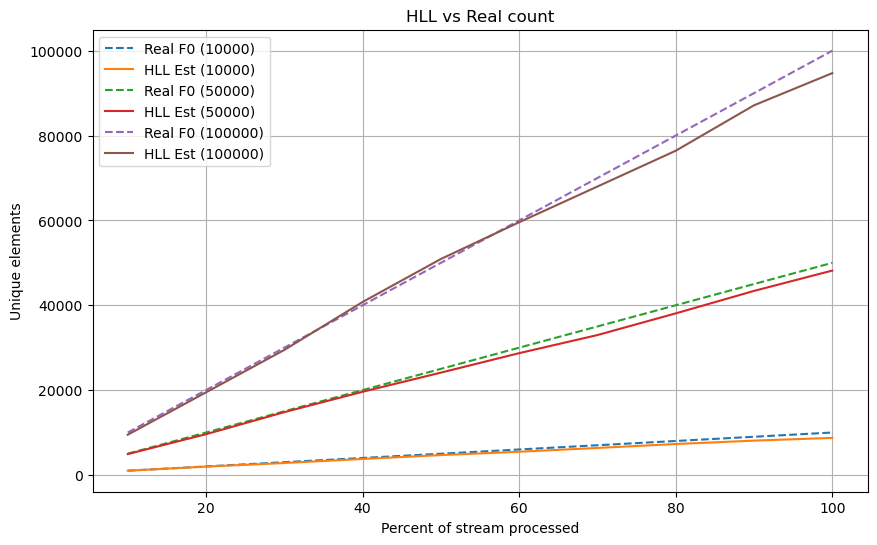

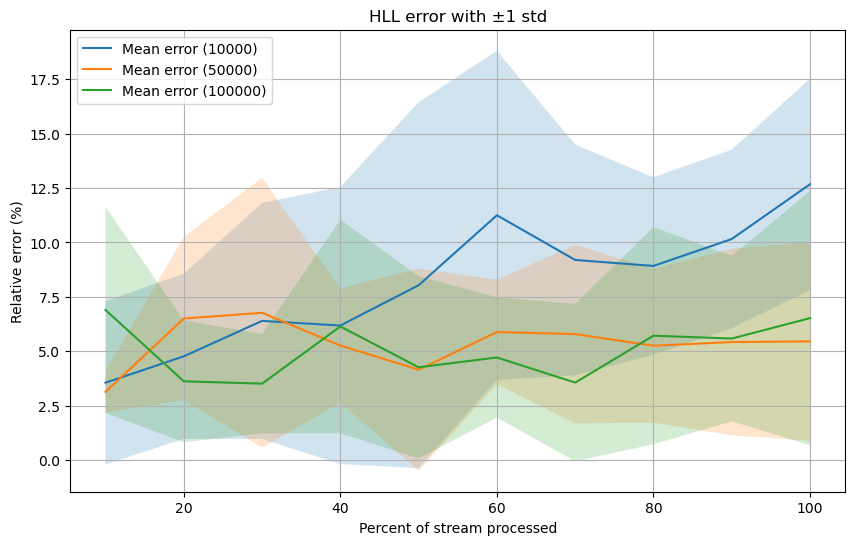

=== Statistics ===
Size 10000: Mean error = 8.11%, Std = 5.76%
Size 50000: Mean error = 5.36%, Std = 3.71%
Size 100000: Mean error = 5.05%, Std = 3.94%

For B=8, m=256:
Theoretical error bound √(1.04/m) = 6.37%
Theoretical error bound √(1.3/m) = 7.13%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('experiment.csv')

plt.figure(figsize=(10,6))
for size in df['stream_size'].unique():
    sub = df[df['stream_size']==size]
    avg = sub.groupby('percent')[['real','estimate']].mean()
    plt.plot(avg.index, avg['real'], '--', label=f'Real F0 ({size})')
    plt.plot(avg.index, avg['estimate'], '-', label=f'HLL Est ({size})')

plt.xlabel('Percent of stream processed')
plt.ylabel('Unique elements')
plt.title('HLL vs Real count')
plt.legend()
plt.grid(True)
plt.savefig('hll_vs_real.png')
plt.show()

plt.figure(figsize=(10,6))
for size in df['stream_size'].unique():
    sub = df[df['stream_size']==size]
    stats = sub.groupby('percent')['error'].agg(['mean','std'])
    x = stats.index
    plt.plot(x, stats['mean'], label=f'Mean error ({size})')
    plt.fill_between(x, stats['mean']-stats['std'], stats['mean']+stats['std'], alpha=0.2)

plt.xlabel('Percent of stream processed')
plt.ylabel('Relative error (%)')
plt.title('HLL error with ±1 std')
plt.legend()
plt.grid(True)
plt.savefig('hll_error.png')
plt.show()

print("=== Statistics ===")
for size in df['stream_size'].unique():
    sub = df[df['stream_size']==size]
    mean_err = sub['error'].mean()
    std_err = sub['error'].std()
    print(f"Size {size}: Mean error = {mean_err:.2f}%, Std = {std_err:.2f}%")

B = 8
m = 1 << B
print(f"\nFor B={B}, m={m}:")
print(f"Theoretical error bound √(1.04/m) = {np.sqrt(1.04/m)*100:.2f}%")
print(f"Theoretical error bound √(1.3/m) = {np.sqrt(1.3/m)*100:.2f}%")

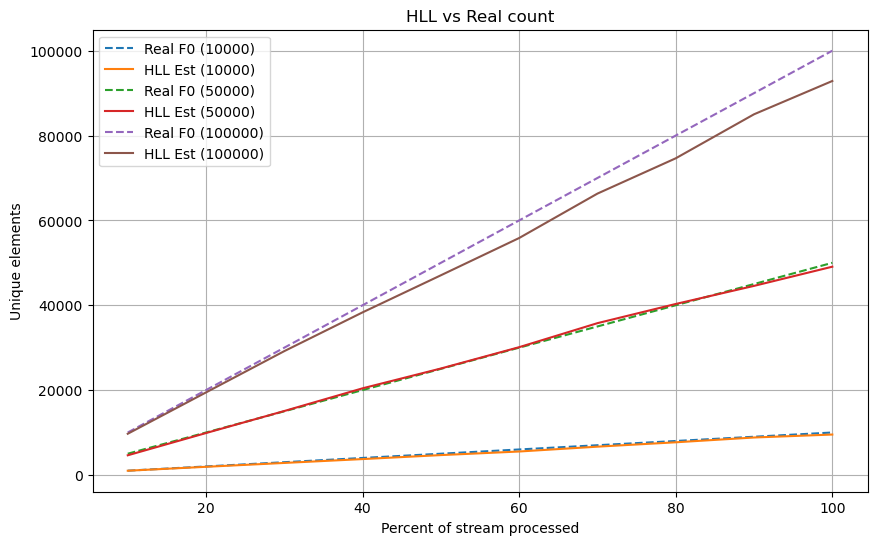

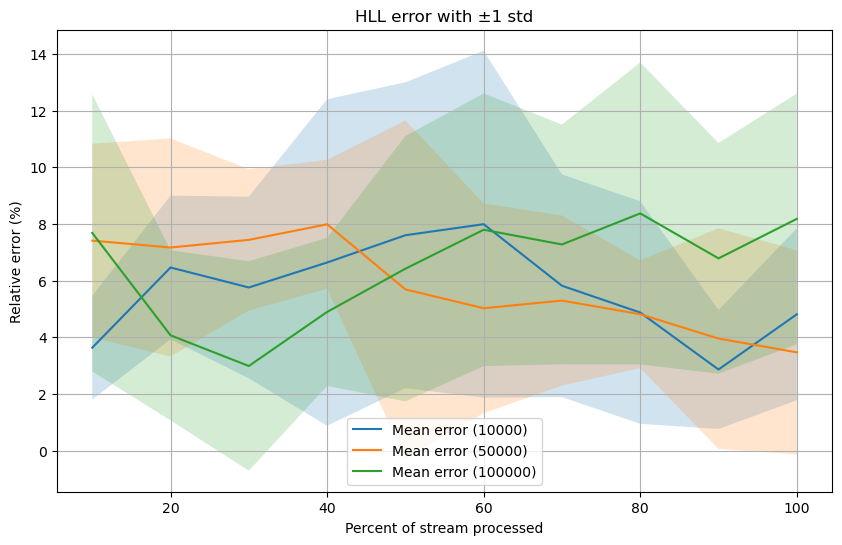

=== Statistics ===
Size 10000: Mean error = 5.65%, Std = 3.99%
Size 50000: Mean error = 5.83%, Std = 3.57%
Size 100000: Mean error = 6.45%, Std = 4.23%

For B=8, m=256:
Theoretical error bound √(1.04/m) = 6.37%
Theoretical error bound √(1.3/m) = 7.13%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('experiment_optimized.csv')

plt.figure(figsize=(10,6))
for size in df['stream_size'].unique():
    sub = df[df['stream_size']==size]
    avg = sub.groupby('percent')[['real','estimate']].mean()
    plt.plot(avg.index, avg['real'], '--', label=f'Real F0 ({size})')
    plt.plot(avg.index, avg['estimate'], '-', label=f'HLL Est ({size})')

plt.xlabel('Percent of stream processed')
plt.ylabel('Unique elements')
plt.title('HLL vs Real count')
plt.legend()
plt.grid(True)
plt.savefig('hll_vs_real.png')
plt.show()

plt.figure(figsize=(10,6))
for size in df['stream_size'].unique():
    sub = df[df['stream_size']==size]
    stats = sub.groupby('percent')['error'].agg(['mean','std'])
    x = stats.index
    plt.plot(x, stats['mean'], label=f'Mean error ({size})')
    plt.fill_between(x, stats['mean']-stats['std'], stats['mean']+stats['std'], alpha=0.2)

plt.xlabel('Percent of stream processed')
plt.ylabel('Relative error (%)')
plt.title('HLL error with ±1 std')
plt.legend()
plt.grid(True)
plt.savefig('hll_error.png')
plt.show()

print("=== Statistics ===")
for size in df['stream_size'].unique():
    sub = df[df['stream_size']==size]
    mean_err = sub['error'].mean()
    std_err = sub['error'].std()
    print(f"Size {size}: Mean error = {mean_err:.2f}%, Std = {std_err:.2f}%")

B = 8
m = 1 << B
print(f"\nFor B={B}, m={m}:")
print(f"Theoretical error bound √(1.04/m) = {np.sqrt(1.04/m)*100:.2f}%")
print(f"Theoretical error bound √(1.3/m) = {np.sqrt(1.3/m)*100:.2f}%")